In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
% matplotlib inline

In [3]:
#reading data
tumor_df=pd.read_csv('data.csv')

In [4]:
#checking data
tumor_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#getting insights of data
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
#Columns in Data
tumor_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
#dropping the unnecessary feature
tumor_df.drop('id',axis=1,inplace=True)


In [8]:
#Creating a dummy variable
target=pd.get_dummies(tumor_df['diagnosis'],drop_first=True)


In [9]:
tumor_df.drop('diagnosis',axis=1,inplace=True)

In [10]:
tumor_df['target']=target

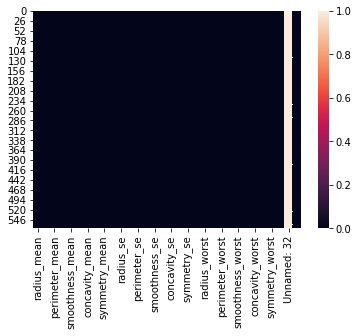

In [12]:
#checking data for any missing value
sns.heatmap(tumor_df.isnull())

In [13]:
#dropping the column with missing values
tumor_df.drop('Unnamed: 32',axis=1,inplace=True)

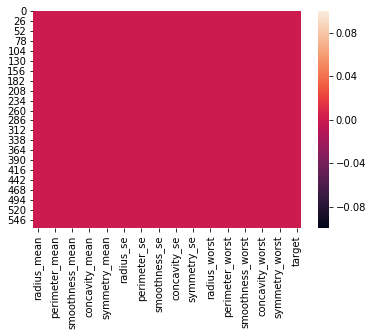

In [14]:
#visaualizing data for further checking of missing values
sns.heatmap(tumor_df.isnull())

In [15]:
#importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler


In [16]:
scaler=StandardScaler()

In [17]:

scaler.fit(tumor_df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features=scaler.transform(tumor_df.drop('target',axis=1))

In [19]:
feat_df=pd.DataFrame(scaled_features,columns=tumor_df.columns[:-1])

In [20]:
from sklearn.cross_validation import train_test_split

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X=feat_df
y=tumor_df['target']

In [61]:
#splitting the data for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logm=LogisticRegression()

In [64]:
logm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
pred=logm.predict(X_test)

In [66]:
#Checking accuracy
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[104   1]
 [  3  63]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       105
          1       0.98      0.95      0.97        66

avg / total       0.98      0.98      0.98       171



In [67]:
# importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# instanciating and fitting KNEihghborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [69]:
#predicting value
pred=knn.predict(X_test)

In [70]:
#Checking accuracy
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[102   3]
 [  5  61]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       105
          1       0.95      0.92      0.94        66

avg / total       0.95      0.95      0.95       171



In [71]:
#finding the best k possible
error_rate=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))


Text(0,0.5,'Error rate')

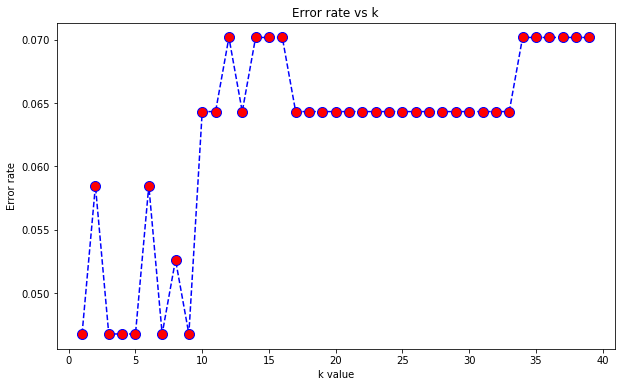

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs k')
plt.xlabel('k value')
plt.ylabel('Error rate')

In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)


In [74]:
#Checking accuracy
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[103   2]
 [  7  59]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       105
          1       0.97      0.89      0.93        66

avg / total       0.95      0.95      0.95       171



In [75]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
prediction=dtree.predict(X_test)

In [77]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))


[[98  7]
 [10 56]]
             precision    recall  f1-score   support

          0       0.91      0.93      0.92       105
          1       0.89      0.85      0.87        66

avg / total       0.90      0.90      0.90       171



In [93]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
prediction=rfc.predict(X_test)

In [95]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))


[[100   5]
 [  6  60]]
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       105
          1       0.92      0.91      0.92        66

avg / total       0.94      0.94      0.94       171



we tried 4 different models on the given breast cancer prediction dataset
and come to conclusion that 
logistic regression is the best fitting model on the data with a precision of 98%